In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv('train1.csv')
df2 = pd.read_csv('train2.csv')
df3 = pd.read_csv('train3.csv')

In [3]:
df1.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,uniqueID
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,100000
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,100001
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0,100002
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0,100003
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0,100004


In [4]:
df1.shape, df2.shape, df3.shape

((52203, 11), (37153, 12), (32578, 12))

In [5]:
df2.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,uniqueID
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,152203
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,152204
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0,152205
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0,152206
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0,152207


## Data cleaning

#### Storey_range attribute

In [6]:
ranges = df2.storey_range.values

In [7]:
ranges

array(['07 TO 09', '01 TO 03', '01 TO 03', ..., '10 TO 12', '01 TO 03',
       '10 TO 12'], dtype=object)

In [8]:
up = []
for i in ranges:
    up.append(i.split("TO"))  

In [9]:
toponly = [int(j[1]) for j in up]

In [10]:
def Gettopfloor(floorrange):
    topfloor = floorrange.split("TO")
    topfloor = int(topfloor[1])
    return topfloor 

In [11]:
df1['storey_range'] = df1['storey_range'].apply(Gettopfloor)
df2['storey_range'] = df2['storey_range'].apply(Gettopfloor)
df3['storey_range'] = df3['storey_range'].apply(Gettopfloor)

#### Month and Remaining Lease year attribute

In [12]:
#Adding year if the month is in August(08) and above

def Addingmonth(month):
    splitMonth = month.split("-")
    finalmonth = int(splitMonth[1])
    finalyear = int(splitMonth[0])
    if(finalmonth>8):
        finalyear = finalyear+1
    return finalyear 

In [13]:
df1['month'] = df1['month'].apply(Addingmonth)
df2['month'] = df2['month'].apply(Addingmonth)
df3['month'] = df3['month'].apply(Addingmonth)

In [14]:
#Adding year if the month is in August(08) and above of "remaining lease" column

def CalculateRemaingLease(date):
   splitDate = date.split(" ")
   size = len(splitDate)
   finalYear = int(splitDate[0])
   if(size>2):
       month = int(splitDate[2])
       if(month>8):
           finalYear = finalYear+1
   return finalYear

In [15]:
df3['remaining_lease_year'] = df3['remaining_lease'].apply(CalculateRemaingLease)

In [16]:
# Deleting 'remaining lease' column which not require
del df3['remaining_lease']
df3['remaining_lease'] = df3['remaining_lease_year']
del df3['remaining_lease_year']

In [17]:
df1.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,uniqueID
0,2012,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,10,45.0,Improved,1986,250000.0,100000
1,2012,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,5,44.0,Improved,1980,265000.0,100001
2,2012,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,10,68.0,New Generation,1980,315000.0,100002
3,2012,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,5,67.0,New Generation,1984,320000.0,100003
4,2012,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,10,67.0,New Generation,1980,321000.0,100004


In [18]:
df2.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,uniqueID
0,2015,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,9,60.0,Improved,1986,70,255000.0,152203
1,2015,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,3,68.0,New Generation,1981,65,275000.0,152204
2,2015,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,3,69.0,New Generation,1980,64,285000.0,152205
3,2015,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,3,68.0,New Generation,1979,63,290000.0,152206
4,2015,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,9,68.0,New Generation,1980,64,290000.0,152207


In [19]:
df3.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,uniqueID,remaining_lease
0,2017,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,12,44.0,Improved,1979,232000.0,189356,61
1,2017,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,3,67.0,New Generation,1978,250000.0,189357,60
2,2017,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,3,67.0,New Generation,1980,262000.0,189358,62
3,2017,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,6,68.0,New Generation,1980,265000.0,189359,62
4,2017,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,3,67.0,New Generation,1980,265000.0,189360,62


#### Adding Remaining_lease attribute in df1

In [20]:
df1.dtypes

month                    int64
town                    object
flat_type               object
block                   object
street_name             object
storey_range             int64
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
uniqueID                 int64
dtype: object

In [21]:
df1['remaining_lease'] = (99 -(df1['month'] - df1['lease_commence_date']))

In [22]:
df1.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,uniqueID,remaining_lease
0,2012,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,10,45.0,Improved,1986,250000.0,100000,73
1,2012,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,5,44.0,Improved,1980,265000.0,100001,67
2,2012,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,10,68.0,New Generation,1980,315000.0,100002,67
3,2012,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,5,67.0,New Generation,1984,320000.0,100003,71
4,2012,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,10,67.0,New Generation,1980,321000.0,100004,67


In [23]:
df1.isnull().sum(),df2.isnull().sum(), df3.isnull().sum()

(month                  0
 town                   0
 flat_type              0
 block                  0
 street_name            0
 storey_range           0
 floor_area_sqm         0
 flat_model             0
 lease_commence_date    0
 resale_price           0
 uniqueID               0
 remaining_lease        0
 dtype: int64,
 month                  0
 town                   0
 flat_type              0
 block                  0
 street_name            0
 storey_range           0
 floor_area_sqm         0
 flat_model             0
 lease_commence_date    0
 remaining_lease        0
 resale_price           0
 uniqueID               0
 dtype: int64,
 month                  0
 town                   0
 flat_type              0
 block                  0
 street_name            0
 storey_range           0
 floor_area_sqm         0
 flat_model             0
 lease_commence_date    0
 resale_price           0
 uniqueID               0
 remaining_lease        0
 dtype: int64)

In [24]:
df1.shape, df2.shape, df3.shape

((52203, 12), (37153, 12), (32578, 12))

### Concating the 3 dataframe

In [25]:
frames = [df1,df2,df3]
all3 = pd.concat(frames)

In [26]:
all3.shape

(121934, 12)

In [27]:
all3.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
uniqueID               0
remaining_lease        0
dtype: int64

In [28]:
all3.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,uniqueID,remaining_lease
0,2012,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,10,45.0,Improved,1986,250000.0,100000,73
1,2012,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,5,44.0,Improved,1980,265000.0,100001,67
2,2012,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,10,68.0,New Generation,1980,315000.0,100002,67
3,2012,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,5,67.0,New Generation,1984,320000.0,100003,71
4,2012,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,10,67.0,New Generation,1980,321000.0,100004,67


In [29]:
Building_new = all3['street_name']+" "+'BLK'+" "+all3['block']

In [30]:
distance = pd.read_csv('building_to_mrt_distance.csv')

In [31]:
distance.head()

,Building,Jurong East MRT station,Bukit Batok MRT station,Bukit Gombak MRT station,Choa Chu Kang MRT station,Yew Tee MRT station,Kranji MRT station,Marsiling MRT station,Woodlands MRT station,Admiralty MRT station,...,Bendemeer MRT station,Geylang Bahru MRT Station,Mattar MRT station,Ubi MRT station,Kaki Bukit MRT Station,Bedok North MRT station,Bedok Reservoir MRT station,Tampines West MRT station,Tampines East MRT station,Upper Changi MRT station
0,ANCHORVALE ST BLK 331C,17818.84265,16471.03384,15856.79247,16199.22480,15808.72792,14570.109930,13485.500120,12369.979820,11061.899320,...,9584.39327,8494.000192,7640.691202,7398.618897,7079.585070,7440.940807,8107.447171,7743.354078,8438.549604,9950.182657
1,PUNGGOL WAY BLK 266B,19092.61457,17694.05674,17032.15623,17205.95322,16731.88625,15248.533120,14065.860790,12863.730930,11445.713010,...,10932.92815,9808.425468,8872.302279,8425.747280,7957.972942,8163.873942,8589.377565,8042.543847,8366.769609,9996.575353
2,YISHUN AVE 9 BLK 318A,15919.39969,14166.65357,13182.50154,12293.68148,11439.72263,9122.636441,7722.266883,6368.157244,4795.908711,...,13570.68606,12907.865810,12661.750790,13179.447730,13208.994580,13791.613210,14675.215580,14401.138090,15072.755350,16621.097390
3,YISHUN AVE 9 BLK 318B,15903.04510,14152.90288,13171.66285,12296.13129,11447.44104,9144.786709,7748.983596,6398.540744,4831.224121,...,13515.78029,12851.563270,12604.181940,13121.274190,13151.040900,13734.103470,14618.776730,14345.977870,15020.740460,16567.813760
4,YISHUN AVE 9 BLK 315A,15705.88647,13955.91314,12975.36314,12109.29884,11267.18726,8991.283610,7607.087576,6267.390055,4716.850722,...,13402.90599,12752.522990,12524.591610,13068.535130,13115.059640,13710.617970,14613.647670,14356.366340,15058.662370,16595.614410


#### Comparing values of Building and bilding new columns

In [32]:
build_list = distance['Building'].tolist()
new_list = Building_new.tolist()

In [33]:
matching_vals = []

for val in build_list:
    if val in new_list:
        matching_vals.append(val)
    else:
        continue

print (matching_vals)

['ADMIRALTY LINK BLK 484', 'ADMIRALTY LINK BLK 485', 'ADMIRALTY LINK BLK 493', 'ADMIRALTY LINK BLK 492', 'ADMIRALTY LINK BLK 491', 'ADMIRALTY LINK BLK 486', 'ADMIRALTY LINK BLK 483', 'SEMBAWANG DR BLK 466C', 'SEMBAWANG DR BLK 466D', 'ADMIRALTY LINK BLK 487', 'ADMIRALTY LINK BLK 482', 'SEMBAWANG DR BLK 466A', 'SEMBAWANG DR BLK 466B', 'ADMIRALTY LINK BLK 490', 'ADMIRALTY LINK BLK 488', 'ADMIRALTY LINK BLK 489', 'CANBERRA RD BLK 425', 'ADMIRALTY LINK BLK 401', 'WELLINGTON CIRCLE BLK 513', 'ADMIRALTY LINK BLK 403', 'WELLINGTON CIRCLE BLK 510B', 'ADMIRALTY LINK BLK 402', 'CANBERRA RD BLK 424', 'CANBERRA RD BLK 423', 'ADMIRALTY LINK BLK 404', 'WELLINGTON CIRCLE BLK 510A', 'SEMBAWANG DR BLK 408', 'SEMBAWANG DR BLK 407', 'ADMIRALTY LINK BLK 405', 'CANBERRA RD BLK 422', 'WELLINGTON CIRCLE BLK 509B', 'SEMBAWANG DR BLK 409', 'SEMBAWANG DR BLK 406', 'WELLINGTON CIRCLE BLK 509A', 'CANBERRA RD BLK 421', 'WELLINGTON CIRCLE BLK 508C', 'WELLINGTON CIRCLE BLK 507B', 'SEMBAWANG DR BLK 481', 'ADMIRALTY DR

In [34]:
# getting unique values in the list
import pandas as pd
drop_dups  = pd.Series(matching_vals).drop_duplicates().tolist()
drop_dups

['ADMIRALTY LINK BLK 484',
 'ADMIRALTY LINK BLK 485',
 'ADMIRALTY LINK BLK 493',
 'ADMIRALTY LINK BLK 492',
 'ADMIRALTY LINK BLK 491',
 'ADMIRALTY LINK BLK 486',
 'ADMIRALTY LINK BLK 483',
 'SEMBAWANG DR BLK 466C',
 'SEMBAWANG DR BLK 466D',
 'ADMIRALTY LINK BLK 487',
 'ADMIRALTY LINK BLK 482',
 'SEMBAWANG DR BLK 466A',
 'SEMBAWANG DR BLK 466B',
 'ADMIRALTY LINK BLK 490',
 'ADMIRALTY LINK BLK 488',
 'ADMIRALTY LINK BLK 489',
 'CANBERRA RD BLK 425',
 'ADMIRALTY LINK BLK 401',
 'WELLINGTON CIRCLE BLK 513',
 'ADMIRALTY LINK BLK 403',
 'WELLINGTON CIRCLE BLK 510B',
 'ADMIRALTY LINK BLK 402',
 'CANBERRA RD BLK 424',
 'CANBERRA RD BLK 423',
 'ADMIRALTY LINK BLK 404',
 'WELLINGTON CIRCLE BLK 510A',
 'SEMBAWANG DR BLK 408',
 'SEMBAWANG DR BLK 407',
 'ADMIRALTY LINK BLK 405',
 'CANBERRA RD BLK 422',
 'WELLINGTON CIRCLE BLK 509B',
 'SEMBAWANG DR BLK 409',
 'SEMBAWANG DR BLK 406',
 'WELLINGTON CIRCLE BLK 509A',
 'CANBERRA RD BLK 421',
 'WELLINGTON CIRCLE BLK 508C',
 'WELLINGTON CIRCLE BLK 507B',
 

In [35]:
#Getting count of list
len(drop_dups)

8614

In [36]:
all3['Building'] = Building_new

In [37]:
all3.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,uniqueID,remaining_lease,Building
0,2012,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,10,45.0,Improved,1986,250000.0,100000,73,ANG MO KIO AVE 4 BLK 172
1,2012,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,5,44.0,Improved,1980,265000.0,100001,67,ANG MO KIO AVE 8 BLK 510
2,2012,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,10,68.0,New Generation,1980,315000.0,100002,67,ANG MO KIO AVE 4 BLK 610
3,2012,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,5,67.0,New Generation,1984,320000.0,100003,71,ANG MO KIO AVE 10 BLK 474
4,2012,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,10,67.0,New Generation,1980,321000.0,100004,67,ANG MO KIO AVE 5 BLK 604


In [38]:
all3.dtypes

month                    int64
town                    object
flat_type               object
block                   object
street_name             object
storey_range             int64
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
uniqueID                 int64
remaining_lease          int64
Building                object
dtype: object

### Converting into appropriate datatype

In [39]:
all3['block'] = all3['block'].astype('category')
all3['flat_model'] = all3['flat_model'].astype('category')
all3['flat_type'] = all3['flat_type'].astype('category')
all3['town'] = all3['town'].astype('category')
all3['street_name'] = all3['street_name'].astype('category')

In [40]:
all3.dtypes

month                     int64
town                   category
flat_type              category
block                  category
street_name            category
storey_range              int64
floor_area_sqm          float64
flat_model             category
lease_commence_date       int64
resale_price            float64
uniqueID                  int64
remaining_lease           int64
Building                 object
dtype: object

In [41]:
all3.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
uniqueID               0
remaining_lease        0
Building               0
dtype: int64

# Merging all data

In [42]:
Final_df = pd.merge(all3,distance, how = 'outer', on = 'Building')

In [43]:
distance.shape,all3.shape

((8811, 120), (121934, 13))

In [44]:
Final_df.shape

(122131, 132)

In [45]:
Final_df.dtypes

month                           float64
town                           category
flat_type                      category
block                          category
street_name                    category
                                 ...   
Bedok North MRT station         float64
Bedok Reservoir MRT station     float64
Tampines West MRT station       float64
Tampines East MRT station       float64
Upper Changi MRT station        float64
Length: 132, dtype: object

In [46]:
del Final_df['Building'] 

In [47]:
Final_df.shape

(122131, 131)

In [48]:
Final_df.street_name.values

[ANG MO KIO AVE 4, ANG MO KIO AVE 4, ANG MO KIO AVE 4, ANG MO KIO AVE 4, ANG MO KIO AVE 4, ..., NaN, NaN, NaN, NaN, NaN]
Length: 122131
Categories (527, object): [ADMIRALTY DR, ADMIRALTY LINK, AH HOOD RD, ALJUNIED CRES, ..., YUNG LOH RD, YUNG PING RD, YUNG SHENG RD, ZION RD]

In [49]:
Final_df.isnull().sum()

month                          197
town                           197
flat_type                      197
block                          197
street_name                    197
                              ... 
Bedok North MRT station          0
Bedok Reservoir MRT station      0
Tampines West MRT station        0
Tampines East MRT station        0
Upper Changi MRT station         0
Length: 131, dtype: int64

In [50]:
Final_df.isnull().sum().sort_values(ascending = False).head(20)

month                      197
floor_area_sqm             197
uniqueID                   197
resale_price               197
lease_commence_date        197
flat_model                 197
remaining_lease            197
storey_range               197
block                      197
flat_type                  197
town                       197
street_name                197
Eunos MRT station            0
Lavender MRT station         0
Kallang MRT station          0
Aljunied MRT station         0
Paya Lebar MRT station       0
Tanah Merah MRT station      0
Kembangan MRT station        0
Bedok MRT station            0
dtype: int64

In [51]:
Final_df.dropna(inplace=True)

In [52]:
Final_df.isnull().sum().head(20), Final_df.shape

(month                        0
 town                         0
 flat_type                    0
 block                        0
 street_name                  0
 storey_range                 0
 floor_area_sqm               0
 flat_model                   0
 lease_commence_date          0
 resale_price                 0
 uniqueID                     0
 remaining_lease              0
 Jurong East MRT station      0
 Bukit Batok MRT station      0
 Bukit Gombak MRT station     0
 Choa Chu Kang MRT station    0
 Yew Tee MRT station          0
 Kranji MRT station           0
 Marsiling MRT station        0
 Woodlands MRT station        0
 dtype: int64,
 (121934, 131))

<h1 style='color:Purple'>Clustering</h1>

In [59]:
from sklearn.cluster import KMeans
import copy as cp

In [60]:
Final_df.shape

(121934, 131)

In [66]:
Final_df.drop("uniqueID",axis=1,inplace=True)
Final_df.drop("street_name",axis=1,inplace=True)
Final_df.drop(['block','lease_commence_date'],axis=1,inplace=True)

In [67]:
Final_df.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,remaining_lease,Jurong East MRT station,Bukit Batok MRT station,...,Bendemeer MRT station,Geylang Bahru MRT Station,Mattar MRT station,Ubi MRT station,Kaki Bukit MRT Station,Bedok North MRT station,Bedok Reservoir MRT station,Tampines West MRT station,Tampines East MRT station,Upper Changi MRT station
0,2012.0,ANG MO KIO,2 ROOM,10.0,45.0,Improved,250000.0,73.0,11477.78323,10141.0331,...,7396.943191,7076.419886,7368.404889,8633.054865,9181.288024,10097.60426,11482.59923,11746.91309,13278.94819,14345.68675
1,2012.0,ANG MO KIO,3 ROOM,10.0,60.0,Improved,302500.0,73.0,11477.78323,10141.0331,...,7396.943191,7076.419886,7368.404889,8633.054865,9181.288024,10097.60426,11482.59923,11746.91309,13278.94819,14345.68675
2,2012.0,ANG MO KIO,3 ROOM,10.0,60.0,Improved,295000.0,73.0,11477.78323,10141.0331,...,7396.943191,7076.419886,7368.404889,8633.054865,9181.288024,10097.60426,11482.59923,11746.91309,13278.94819,14345.68675
3,2012.0,ANG MO KIO,2 ROOM,6.0,45.0,Improved,259000.0,73.0,11477.78323,10141.0331,...,7396.943191,7076.419886,7368.404889,8633.054865,9181.288024,10097.60426,11482.59923,11746.91309,13278.94819,14345.68675
4,2012.0,ANG MO KIO,2 ROOM,9.0,45.0,Improved,263000.0,73.0,11477.78323,10141.0331,...,7396.943191,7076.419886,7368.404889,8633.054865,9181.288024,10097.60426,11482.59923,11746.91309,13278.94819,14345.68675


In [76]:
Final_df.columns[:8]

Index(['month', 'town', 'flat_type', 'storey_range', 'floor_area_sqm',
       'flat_model', 'resale_price', 'remaining_lease'],
      dtype='object')

In [77]:
cluster_df = Final_df[Final_df.columns[8:]]

<h4 style='color:purple'>Elbow Plot</h4>

In [81]:
#Elbow plot
sse = []
clusterRange = range(1,10)
for k in clusterRange:
    km = KMeans(n_clusters=k)
    km.fit(cluster_df)
    sse.append(km.inertia_)

In [83]:
%matplotlib inline
from matplotlib import pyplot as plt

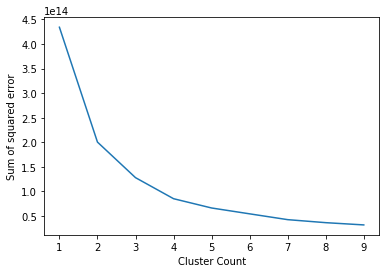

In [84]:
plt.xlabel('Cluster Count')
plt.ylabel('Sum of squared error')
plt.plot(clusterRange,sse)

In [85]:
m = KMeans(n_clusters=4)

In [86]:
predicted_Cluster = km.fit_predict(cluster_df)
print(predicted_Cluster)

[2 2 2 ... 0 0 3]


In [87]:
col_of_cluster = cluster_df.columns
col_of_cluster

Index(['Jurong East MRT station', 'Bukit Batok MRT station',
       'Bukit Gombak MRT station', 'Choa Chu Kang MRT station',
       'Yew Tee MRT station', 'Kranji MRT station', 'Marsiling MRT station',
       'Woodlands MRT station', 'Admiralty MRT station',
       'Sembawang MRT station',
       ...
       'Bendemeer MRT station', 'Geylang Bahru MRT Station',
       'Mattar MRT station', 'Ubi MRT station', 'Kaki Bukit MRT Station',
       'Bedok North MRT station', 'Bedok Reservoir MRT station',
       'Tampines West MRT station', 'Tampines East MRT station',
       'Upper Changi MRT station'],
      dtype='object', length=119)

In [88]:
Final_df['Cluster'] = predicted_Cluster

In [93]:
Final_df.head(3)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,remaining_lease,Jurong East MRT station,Bukit Batok MRT station,...,Geylang Bahru MRT Station,Mattar MRT station,Ubi MRT station,Kaki Bukit MRT Station,Bedok North MRT station,Bedok Reservoir MRT station,Tampines West MRT station,Tampines East MRT station,Upper Changi MRT station,Cluster
0,2012.0,ANG MO KIO,2 ROOM,10.0,45.0,Improved,250000.0,73.0,11477.78323,10141.0331,...,7076.419886,7368.404889,8633.054865,9181.288024,10097.60426,11482.59923,11746.91309,13278.94819,14345.68675,2
1,2012.0,ANG MO KIO,3 ROOM,10.0,60.0,Improved,302500.0,73.0,11477.78323,10141.0331,...,7076.419886,7368.404889,8633.054865,9181.288024,10097.60426,11482.59923,11746.91309,13278.94819,14345.68675,2
2,2012.0,ANG MO KIO,3 ROOM,10.0,60.0,Improved,295000.0,73.0,11477.78323,10141.0331,...,7076.419886,7368.404889,8633.054865,9181.288024,10097.60426,11482.59923,11746.91309,13278.94819,14345.68675,2


In [94]:
# Dropping columns which are used for clustering:
Final_df.drop(col_of_cluster,axis=1,inplace=True)

In [95]:
print(Final_df.shape)
Final_df.head()

(121934, 9)


,month,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,remaining_lease,Cluster
0,2012.0,ANG MO KIO,2 ROOM,10.0,45.0,Improved,250000.0,73.0,2
1,2012.0,ANG MO KIO,3 ROOM,10.0,60.0,Improved,302500.0,73.0,2
2,2012.0,ANG MO KIO,3 ROOM,10.0,60.0,Improved,295000.0,73.0,2
3,2012.0,ANG MO KIO,2 ROOM,6.0,45.0,Improved,259000.0,73.0,2
4,2012.0,ANG MO KIO,2 ROOM,9.0,45.0,Improved,263000.0,73.0,2


In [100]:
def GetClustername(_aminitiesCluster):
    clusterName = "Cluster-1"
    if _aminitiesCluster==0:
         clusterName = "Cluster-1"
    elif _aminitiesCluster==1:
         clusterName = "Cluster-2"
    elif _aminitiesCluster==2:
         clusterName = "Cluster-3"
    elif _aminitiesCluster==3:
         clusterName = "Cluster-4"
    return clusterName

In [101]:
Final_df['AminitiesCluster'] = Final_df.Cluster.apply(GetClustername)

In [102]:
Final_df.head()

,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,remaining_lease,Cluster,AminitiesCluster
0,ANG MO KIO,2 ROOM,10.0,45.0,Improved,250000.0,73.0,2,Cluster-3
1,ANG MO KIO,3 ROOM,10.0,60.0,Improved,302500.0,73.0,2,Cluster-3
2,ANG MO KIO,3 ROOM,10.0,60.0,Improved,295000.0,73.0,2,Cluster-3
3,ANG MO KIO,2 ROOM,6.0,45.0,Improved,259000.0,73.0,2,Cluster-3
4,ANG MO KIO,2 ROOM,9.0,45.0,Improved,263000.0,73.0,2,Cluster-3


In [103]:
Final_df['AminitiesCluster'] = Final_df['AminitiesCluster'].astype('category')
Final_df.dtypes

town                category
flat_type           category
storey_range         float64
floor_area_sqm       float64
flat_model          category
resale_price         float64
remaining_lease      float64
Cluster                int32
AminitiesCluster    category
dtype: object

In [98]:
del Final_df['month']
del Final_df['Cluster']
Final_df.shape

In [105]:
import seaborn as sns

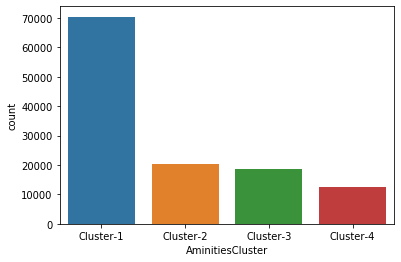

In [111]:
# Plotting Categorical Data
sns.countplot(x="AminitiesCluster", data=Final_df)
plt.show()

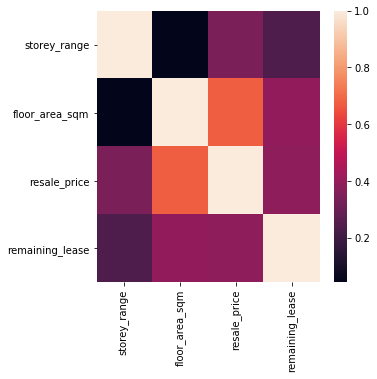

In [110]:
plt.figure(figsize=(5,5))
sns.heatmap(Final_df.corr())
plt.show()

## Train and Test split:

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
Y = Final_df['resale_price']
X = Final_df.drop('resale_price', axis=1)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=123)

In [114]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(97547, 7)
(24387, 7)
(97547,)
(24387,)


In [117]:
num_Atribute = X_train.select_dtypes(['float64','int64']).columns
cat_Attributes = X_train.select_dtypes(['category']).columns
num_unseenAttribute = X_test.select_dtypes(['float64','int64']).columns
cat_unseenAttribute = X_test.select_dtypes(['category']).columns

In [118]:
print("Num attributes",num_Atribute)
print("cat Attributes",cat_Attributes)

Num attributes Index(['storey_range', 'floor_area_sqm', 'remaining_lease'], dtype='object')
cat Attributes Index(['town', 'flat_type', 'flat_model', 'AminitiesCluster'], dtype='object')


### Handling of Numerical attributes

In [120]:
#Imputers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [121]:
numericImputer = SimpleImputer(strategy='median')
numericImputer = numericImputer.fit(X_train[num_Atribute])
X_train[num_Atribute] = numericImputer.transform(X_train[num_Atribute])
X_test[num_Atribute] = numericImputer.transform(X_test[num_Atribute])

C:\Users\hanit\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hanit\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\hanit\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [123]:
scaler = StandardScaler()

scaler = scaler.fit(X_train[num_Atribute])

X_train[num_Atribute]=scaler.transform(X_train[num_Atribute])
X_test[num_Atribute]=scaler.transform(X_test[num_Atribute])

C:\Users\hanit\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\hanit\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\hanit\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

## Handling of Categorical variables

In [122]:
catImputer = SimpleImputer(strategy="most_frequent")
catImputer = catImputer.fit(X_train[cat_Attributes])
X_train[cat_Attributes] = catImputer.transform(X_train[cat_Attributes])
X_test[cat_Attributes] = catImputer.transform(X_test[cat_Attributes])

C:\Users\hanit\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hanit\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\hanit\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [124]:
print("FLAT TYPE ",len(X_train.flat_type.unique()))
print("STOREY RANGE ",len(X_train.storey_range.unique()))
print("FLAT MODEL ",len(X_train.flat_model.unique()))
print("Aminities Cluster ",len(X_train.AminitiesCluster.unique()))

FLAT TYPE  7
STOREY RANGE  23
FLAT MODEL  21
Aminities Cluster  4


In [125]:
X_train = pd.get_dummies(X_train,columns=cat_Attributes,drop_first=True)
X_test = pd.get_dummies(X_test,columns=cat_unseenAttribute,drop_first=True)

In [126]:
print(X_train.shape)
print(X_test.shape)

(97547, 57)
(24387, 56)


In [128]:
# Get missing columns in the training test
missing_cols = set( X_train.columns ) - set( X_test.columns )

# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    print (c)
    X_test[c] = 0
    
# Ensure the order of column in the test set is in the same order than in train set
X_test = X_test[X_train.columns]

flat_model_Adjoined flat


In [129]:
X_train.head()

,storey_range,floor_area_sqm,remaining_lease,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,...,flat_model_Premium Apartment.,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,AminitiesCluster_Cluster-2,AminitiesCluster_Cluster-3,AminitiesCluster_Cluster-4
9065,2.046292,0.568053,1.316436,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
17943,-0.593030,-0.936473,-0.790313,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60994,-1.158599,-0.245204,0.400458,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
116437,-0.027461,-0.082553,1.866023,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18368,-0.027461,1.137333,1.224838,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
X_train.dtypes

storey_range                         float64
floor_area_sqm                       float64
remaining_lease                      float64
town_BEDOK                             uint8
town_BISHAN                            uint8
town_BUKIT BATOK                       uint8
town_BUKIT MERAH                       uint8
town_BUKIT PANJANG                     uint8
town_BUKIT TIMAH                       uint8
town_CENTRAL AREA                      uint8
town_CHOA CHU KANG                     uint8
town_CLEMENTI                          uint8
town_GEYLANG                           uint8
town_HOUGANG                           uint8
town_JURONG EAST                       uint8
town_JURONG WEST                       uint8
town_KALLANG/WHAMPOA                   uint8
town_MARINE PARADE                     uint8
town_PASIR RIS                         uint8
town_PUNGGOL                           uint8
town_QUEENSTOWN                        uint8
town_SEMBAWANG                         uint8
town_SENGK

## PCA

In [131]:
from sklearn.decomposition import PCA 
from matplotlib.pyplot import figure

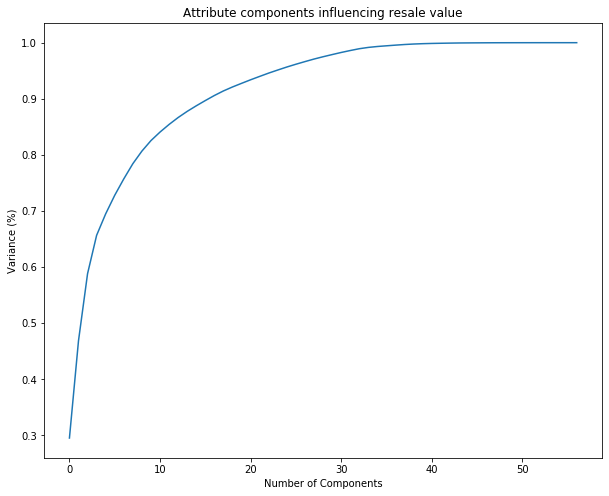

In [133]:
pca = PCA().fit(X_train)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Attribute components influencing resale value')
plt.show()

In [134]:
pca = PCA(n_components = 30) 
X_train_PCA = pca.fit_transform(X_train) 
X_test_PCA = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

<h4 style='color:blue'>MAPE</h4>

In [139]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

<h2 style='color:brown'>MODELS</h2>

In [140]:
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

## Linear Regression

In [141]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,Y_train)

In [142]:
trainPred = model.predict(X_train)
testPred = model.predict(X_test)

In [143]:
print("mean_absolute_percentage_error TRAIN",mean_absolute_percentage_error(Y_train,trainPred))
print("mean_absolute_percentage_error TEST",mean_absolute_percentage_error(Y_test,testPred))

mean_absolute_percentage_error TRAIN 9.5927766222033
mean_absolute_percentage_error TEST 9.531494327723195


<h2 style='color:green'>DecisionTree</h2>

In [144]:
from sklearn.tree import DecisionTreeRegressor

In [145]:
DT_regression = DecisionTreeRegressor(criterion='mse',max_depth=200,random_state=123,min_samples_leaf=5)

## With PCA

In [146]:
DT_regression.fit(X_train_PCA,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=200,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')

In [148]:
trainPred_DT = DT_regression.predict(X_train_PCA)
testPred_DT = DT_regression.predict(X_test_PCA)

In [149]:
print("mean_absolute_percentage_error TRAIN",mean_absolute_percentage_error(Y_train,trainPred_DT))
print("mean_absolute_percentage_error TEST",mean_absolute_percentage_error(Y_test,testPred_DT))

mean_absolute_percentage_error TRAIN 4.439990619155855
mean_absolute_percentage_error TEST 6.340179884682577


### Without PCA

In [151]:
DT_regression.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=200,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')

In [152]:
trainPred_DT_Without = DT_regression.predict(X_train)
testPred_DT_Without = DT_regression.predict(X_test)

In [153]:
print("mean_absolute_percentage_error TRAIN",mean_absolute_percentage_error(Y_train,trainPred_DT_Without))
print("mean_absolute_percentage_error TEST",mean_absolute_percentage_error(Y_test,testPred_DT_Without))

mean_absolute_percentage_error TRAIN 4.927095159345191
mean_absolute_percentage_error TEST 5.97834236658451


## RandomForest

In [154]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [155]:
#Creating RandomForest object
rfr = RandomForestRegressor()

In [156]:
rfr.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)>

## Without PCA

In [157]:
rfr.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [158]:
rfr.feature_importances_

array([8.29451840e-02, 5.27812799e-01, 8.54122888e-02, 7.48040407e-03,
       2.39403252e-03, 1.44387325e-03, 4.43941644e-02, 1.62748132e-03,
       7.58190174e-03, 1.23426505e-02, 3.79443511e-03, 1.34025142e-02,
       9.62550418e-03, 1.76387664e-03, 1.66022569e-03, 4.50115596e-03,
       2.42164973e-03, 1.12506239e-02, 1.22669933e-03, 1.16949404e-03,
       3.38739735e-02, 2.40128800e-04, 1.11741595e-02, 1.78277291e-03,
       6.79592161e-03, 1.58669683e-03, 1.33298013e-03, 1.88692165e-03,
       6.36009818e-04, 1.71196281e-03, 7.20680846e-03, 2.01093267e-03,
       4.02981169e-03, 3.04472428e-05, 1.84837281e-04, 5.29045207e-04,
       2.76027435e-03, 4.12820038e-03, 5.61027701e-05, 5.48557656e-04,
       3.98144440e-03, 1.06623409e-04, 1.37690274e-04, 3.02585645e-05,
       2.12871004e-03, 1.96687263e-03, 3.19568539e-07, 1.44445177e-06,
       2.74932117e-05, 5.60044958e-04, 6.77888399e-04, 1.47510301e-03,
       4.28319027e-04, 7.97601352e-04, 8.83179391e-03, 5.93781525e-02,
      

In [163]:
test_pred_rfr = rfr.predict(X_test)

In [160]:
train_pred_rfr = rfr.predict(X_train)

In [161]:
type(pred_rfr)

numpy.ndarray

In [164]:
print("mean_absolute_percentage_error TRAIN",mean_absolute_percentage_error(Y_train,train_pred_rfr))
print("mean_absolute_percentage_error TEST",mean_absolute_percentage_error(Y_test,test_pred_rfr))

mean_absolute_percentage_error TRAIN 3.8681727723491433
mean_absolute_percentage_error TEST 5.706033421182881


## With PCA

In [165]:
#Creating RandomForest object
rfr_PCA = RandomForestRegressor()

In [166]:
rfr_PCA.fit(X_train_PCA,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [168]:
trainPred_RF_PCA = rfr_PCA.predict(X_train_PCA)
testPred_RF_PCA = rfr_PCA.predict(X_test_PCA)

In [169]:
print("mean_absolute_percentage_error TRAIN",mean_absolute_percentage_error(Y_train,trainPred_RF_PCA))
print("mean_absolute_percentage_error TEST",mean_absolute_percentage_error(Y_test,testPred_RF_PCA))

mean_absolute_percentage_error TRAIN 3.9222866164226384
mean_absolute_percentage_error TEST 5.857204702434855


In [170]:
import pandas as pd
feature_importances = pd.DataFrame(rfr.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [172]:
feature_importances.head(10)

,importance
floor_area_sqm,0.527813
remaining_lease,0.085412
storey_range,0.082945
AminitiesCluster_Cluster-3,0.059378
town_BUKIT MERAH,0.044394
town_QUEENSTOWN,0.033874
town_CLEMENTI,0.013403
AminitiesCluster_Cluster-4,0.012713
town_CENTRAL AREA,0.012343
town_MARINE PARADE,0.011251


In [178]:
for name, importance in zip(X_train.columns, rfr.feature_importances_):
   print(name, "=", importance)   

storey_range = 0.08294518397237179
floor_area_sqm = 0.5278127989680738
remaining_lease = 0.08541228879706583
town_BEDOK = 0.007480404065154528
town_BISHAN = 0.002394032521763095
town_BUKIT BATOK = 0.00144387325391038
town_BUKIT MERAH = 0.04439416443033115
town_BUKIT PANJANG = 0.001627481322514987
town_BUKIT TIMAH = 0.007581901741965285
town_CENTRAL AREA = 0.012342650466284974
town_CHOA CHU KANG = 0.003794435111283674
town_CLEMENTI = 0.013402514221069441
town_GEYLANG = 0.009625504178070624
town_HOUGANG = 0.0017638766426684611
town_JURONG EAST = 0.0016602256935951392
town_JURONG WEST = 0.004501155957688103
town_KALLANG/WHAMPOA = 0.002421649726394353
town_MARINE PARADE = 0.011250623865381086
town_PASIR RIS = 0.0012266993344276264
town_PUNGGOL = 0.0011694940386300643
town_QUEENSTOWN = 0.033873973511434285
town_SEMBAWANG = 0.0002401287999448488
town_SENGKANG = 0.011174159534437364
town_SERANGOON = 0.0017827729064083045
town_TAMPINES = 0.00679592161373585
town_TOA PAYOH = 0.00158669682936742

In [185]:
indices[:10]

array([46, 47, 48, 43, 33, 38, 41, 42, 34, 21], dtype=int64)

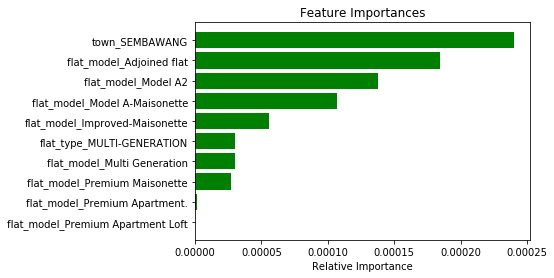

In [189]:
features = X_train.columns
importances = rfr.feature_importances_
indices = np.argsort(importances)
indices = indices[:10]

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
df_RF = pd.DataFrame({'Actual': Y_val, 'Predicted': pred_rfr})

In [ ]:
df_RF25 = df_RF.head(25)
df_RF25

In [ ]:
df_RF25.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### RandomForest with PCA

In [ ]:
#Creating RandomForest object
rfr_PCA = RandomForestRegressor()

In [ ]:
rfr_PCA.fit(X_train_PCA, Y_train)

In [ ]:
pred_RF_trainPCA = rfr_PCA.predict(X_train_PCA)

In [ ]:
RF_pred_valPCA = rfr_PCA.predict(X_val_PCA)

In [ ]:
print("Train error: ", mean_absolute_percentage_error(y_true = Y_train, y_pred = pred_RF_trainPCA ))

In [ ]:
print ("Validation Error: ", mean_absolute_percentage_error(y_true = Y_val, y_pred = RF_pred_valPCA ))

## MultiLinear Regression with Residual analysis